In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data Collection


In [3]:
#loading the dataset
wd=pd.read_csv('wineQualityReds.csv') # wd=Wine Datase

In [4]:
#no. of rows and columns
wd.shape

(1599, 13)

In [5]:
#viewing sample of the dataset
wd.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Data Analysis

In [6]:
#statistical analysis
wd.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


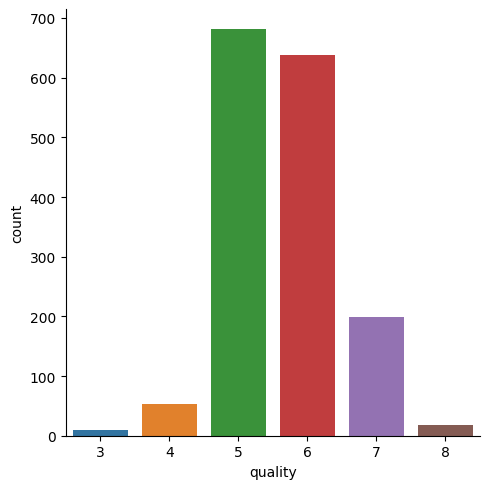

In [7]:
#segragattion based on quality
sns.catplot(x='quality', data=wd, kind = 'count')


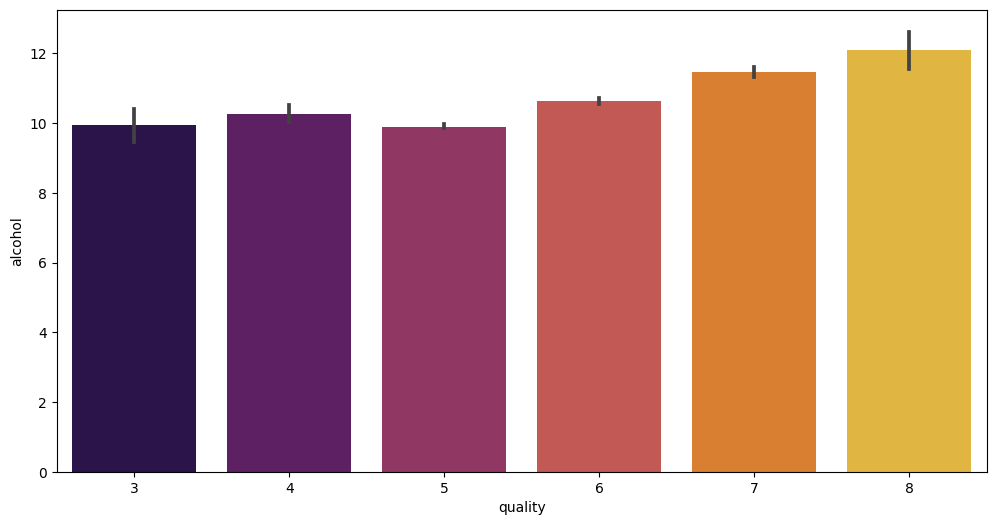

In [8]:
# alcohol vs quality
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y='alcohol', data=wd,  palette='inferno')
plt.show()

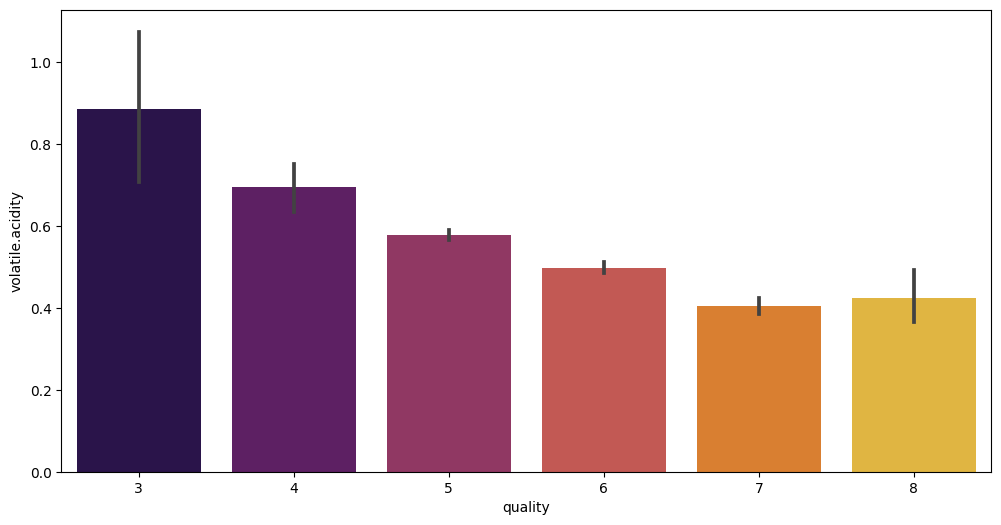

In [9]:
# acidity vs quality
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y='volatile.acidity', data=wd,  palette='inferno')
plt.show()

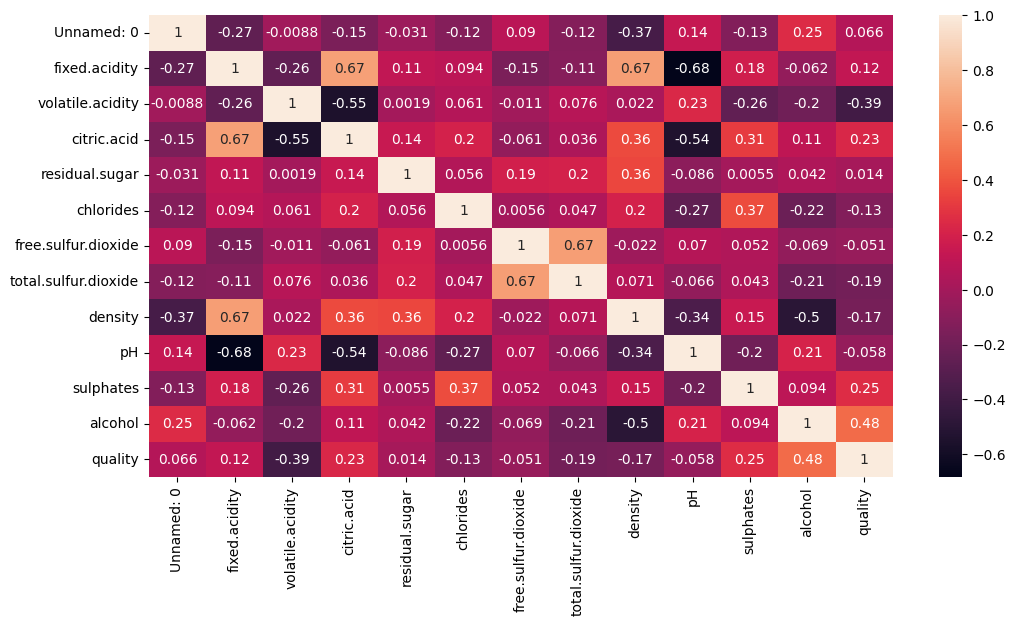

In [11]:
#heatmap for checking all rows with respect to all columns
plot = plt.figure(figsize = (12,6))
sns.heatmap(wd.corr() ,annot = True)
plt.show()

Data Preprocessing


In [12]:
X = wd.drop('quality', axis=1)

In [13]:
y = wd['quality']

In [14]:
##Oversampling
from imblearn.over_sampling import SMOTE
os = SMOTE()
x_res, y_res = os.fit_resample(X, y)


In [15]:
#splitting te dataset into TRAIN and TEST data
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=3) 

In [16]:
from sklearn.preprocessing import StandardScaler 

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

Model Selection


1. Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_std, y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test, predictions)

0.597799511002445

2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier ()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)
accuracy_score(y_test, predictions)

0.7909535452322738

3. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train_std, y_train)
predictions = rf.predict(x_test_std)
accuracy_score(y_test, predictions)

0.8594132029339854

4. Stochastic Gradient Decent Classifier

In [39]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train_std, y_train)
predictions = sgd.predict(x_test_std)
accuracy_score(y_test, predictions)

0.5317848410757946

5. Support Vector Classifier

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_std, y_train)
predictions = svc.predict(x_test_std)
accuracy_score(y_test, predictions)

0.7677261613691931

6.Cross Validation Score for random forest and sgd

In [45]:
rf_eval = cross_val_score(estimator = rf, X = x_train_std, y = y_train, cv = 10)
rf_eval.mean()

0.8610832817395547

Therefore the highest level of accuracy amoung the tested models is of Random Forest Classifier, with an accuracy of 86.2 percent